# Project 1
### Nifty 50 Price Prediction using (Linear Regression)

In [1]:
# Import the necessary libraries all in one go:

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Dataset

# NOTE: Change the file path accordingly 

In [4]:
data = pd.read_csv("/Users/namandeshoria/Desktop/PGDM SEM 3/Machine Learning/NSEI_5yr.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0
1,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0
2,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0
3,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0
4,2018-12-28,10820.950195,10893.599609,10817.150391,10859.900391,10859.900391,245500.0
...,...,...,...,...,...,...,...
1230,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219,334400.0
1231,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391,508800.0
1232,2023-12-18,21434.800781,21482.800781,21365.349609,21418.650391,21418.650391,249700.0
1233,2023-12-19,21477.650391,21505.050781,21337.750000,21453.099609,21453.099609,249800.0


In [5]:
# Call Shape function to know the dimensions of Dataset.

In [6]:
data.shape

(1235, 7)

In [7]:
# Call the Top 5 rows and columns.

In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0
1,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0
2,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0
3,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0
4,2018-12-28,10820.950195,10893.599609,10817.150391,10859.900391,10859.900391,245500.0


In [9]:
# Call the Bottom 5 Rows and Columns.

In [10]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219,334400.0
1231,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391,508800.0
1232,2023-12-18,21434.800781,21482.800781,21365.349609,21418.650391,21418.650391,249700.0
1233,2023-12-19,21477.650391,21505.050781,21337.750000,21453.099609,21453.099609,249800.0
1234,2023-12-20,21543.500000,21593.000000,21087.349609,21150.150391,21150.150391,363900.0


In [11]:
# Find out if there is any null values in our dataset with the sum function to know the total number of null values present in each rows and columns.

In [12]:
data.isna().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [13]:
# delete all the null value using drop function 

In [14]:
data = data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0
1,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0
2,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0
3,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0
4,2018-12-28,10820.950195,10893.599609,10817.150391,10859.900391,10859.900391,245500.0
...,...,...,...,...,...,...,...
1230,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219,334400.0
1231,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391,508800.0
1232,2023-12-18,21434.800781,21482.800781,21365.349609,21418.650391,21418.650391,249700.0
1233,2023-12-19,21477.650391,21505.050781,21337.750000,21453.099609,21453.099609,249800.0


In [15]:
# Re-check if there is any null values still left.

In [16]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
# Here dropiing the Adjusted Column as it is not that much important for our model in predicting the closing price of the nifty.

# Hence the Adjusted Close shows the price of the nifty after adjusting the devidend, Stock Splits, Company Acquisition  & Mergers happened on that particular day ro days.

In [18]:
data.drop('Adj Close', axis=1, inplace=True)
data

/var/folders/zm/y745pcnn2xv02ghymhfqt76w0000gn/T/ipykernel_4124/2808820778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Adj Close', axis=1, inplace=True)


,Date,Open,High,Low,Close,Volume
0,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,377500.0
1,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,223400.0
2,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,263700.0
3,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,456100.0
4,2018-12-28,10820.950195,10893.599609,10817.150391,10859.900391,245500.0
...,...,...,...,...,...,...
1230,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,334400.0
1231,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,508800.0
1232,2023-12-18,21434.800781,21482.800781,21365.349609,21418.650391,249700.0
1233,2023-12-19,21477.650391,21505.050781,21337.750000,21453.099609,249800.0


In [19]:
# Plot the Time Series graph to visualie the movement of the Nifty 50 Index during these 5 years.

/var/folders/zm/y745pcnn2xv02ghymhfqt76w0000gn/T/ipykernel_4124/4250663749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


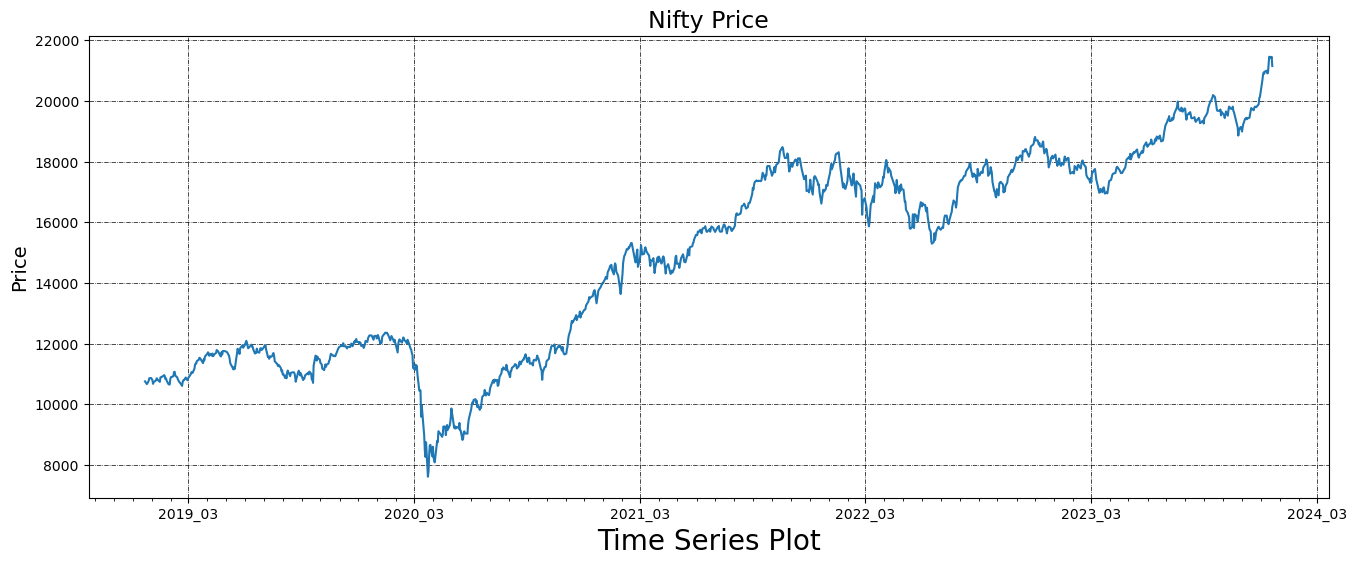

In [20]:
import matplotlib.dates as mdates

data['Date'] = pd.to_datetime(data['Date'])
Date = data['Date']
Close = data['Close']

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(Date, Close)

custom_format = mdates.DateFormatter('%Y_%m')
ax.xaxis.set_major_formatter(custom_format)

# Adjust the locator based on your preference
# Here, I'm using a MonthLocator with an interval of 12 month

month_locator = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.title("Nifty Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time Series Plot', fontsize=20)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

plt.show()


In [21]:
# Preparing Feature Variable and Target Variable for the Linear Regression Model.

In [22]:
feature = data[['Open','High','Low','Volume']]
target = data['Close']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)

In [24]:
#Training a Linear Regression Model

In [25]:
model = LinearRegression()

In [26]:
#Now, we need to fit the line to our data,
#we will do that by using the .fit() method along with our X_train and y_train data:

In [27]:
model.fit(X_train, y_train,)

LinearRegression()

In [28]:
# #If no errors are thrown - the regressor found the best fitting line! The line is defined by our features and the intercept/slope. 
#In fact, we can inspect the intercept and slope by printing the regressor.intecept_ and regressor.coef_ attributes, respectively

In [29]:
print(model.intercept_)

-23.132576964204418


In [30]:
#For retrieving the slope (which is also the coefficient of x)

In [31]:
print(model.coef_)

[-6.97715948e-01  9.16346485e-01  7.82631368e-01  1.51961851e-05]


In [32]:
def calc(slope, intercept, *features):
    return slope * features[0] + slope * features[1] + slope * features[2] + slope * features[3] + intercept
score = calc(model.coef_[0], model.intercept_, 1.65, -1.96, 3.47, 2.91)
print(score)

-27.367712765649998


In [33]:
score = model.predict([[1.65,-1.96,3.47,2.91]])
print(score)

[-23.36407232]


/Users/namandeshoria/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
# Checking thr accuracy & Performance of the model using different methods.

In [35]:
print(f'Performance (R^2): {model.score(X_train, y_train) * 100:.2f}%')

Performance (R^2): 99.98%


In [36]:
# Now we will test the model

In [37]:
prediction = model.predict(X_test)

In [38]:
# Here we can check the Actual value and predicted value derived from our model.

In [39]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': prediction.squeeze()})
print(df_preds)

           Actual     Predicted
19   10906.950195  10873.613423
344   9039.250000   9063.590128
470  12938.250000  12913.741745
854  16356.250000  16370.240844
953  18145.400391  18121.877934
..            ...           ...
720  17415.050781  17446.479429
429  11250.549805  11309.880406
905  17490.699219  17524.307804
877  16216.000000  16224.103966
270  12035.799805  12043.122100

[247 rows x 2 columns]


In [40]:
df_preds

,Actual,Predicted
19,10906.950195,10873.613423
344,9039.250000,9063.590128
470,12938.250000,12913.741745
854,16356.250000,16370.240844
953,18145.400391,18121.877934
...,...,...
720,17415.050781,17446.479429
429,11250.549805,11309.880406
905,17490.699219,17524.307804
877,16216.000000,16224.103966


In [41]:
graph = df_preds.head(10)
graph

,Actual,Predicted
19,10906.950195,10873.613423
344,9039.250000,9063.590128
470,12938.250000,12913.741745
854,16356.250000,16370.240844
953,18145.400391,18121.877934
799,17287.050781,17316.885518
652,16529.099609,16525.470676
53,11168.049805,11160.740119
731,17516.849609,17430.933612
1144,19570.849609,19565.743327


In [42]:
# Visualise the above Actual and predicted value using bar graph

# We can simply see the difference between the tops of the Actual Value Bar and Predicted Value Bar
# Hence our model is predicting the values with high accuracy.

<Axes: >

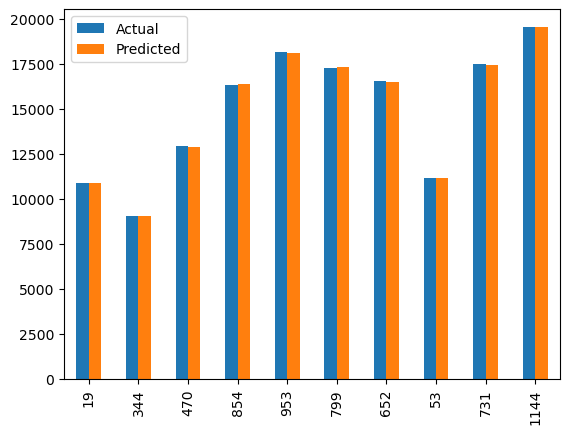

In [43]:
graph.plot(kind='bar')

In [44]:
# Another way to visualise the Actual and Predicted Values using a heatmap

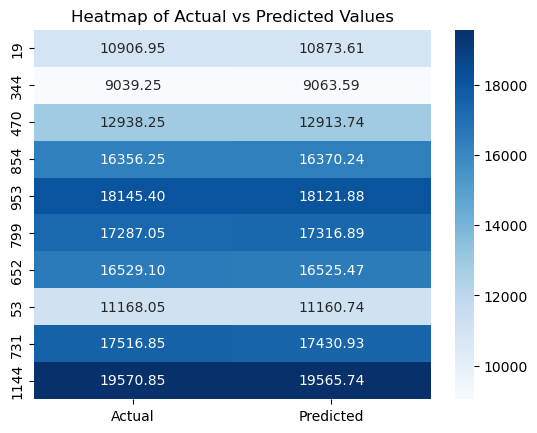

In [45]:
sns.heatmap(graph[['Actual', 'Predicted']], annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap of Actual vs Predicted Values')
plt.show()


In [46]:
# Another ways to check the accuracy of the Linear Regression Model.

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)

In [48]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 31.70
Mean squared error: 1702.94
Root mean squared error: 41.27


In [49]:
# Visualising the Actual Values and Predicted Values of oue model using a scatterplot.

# Hence,the graph represents the linearity betweent he Actual Values and Predicted Value.

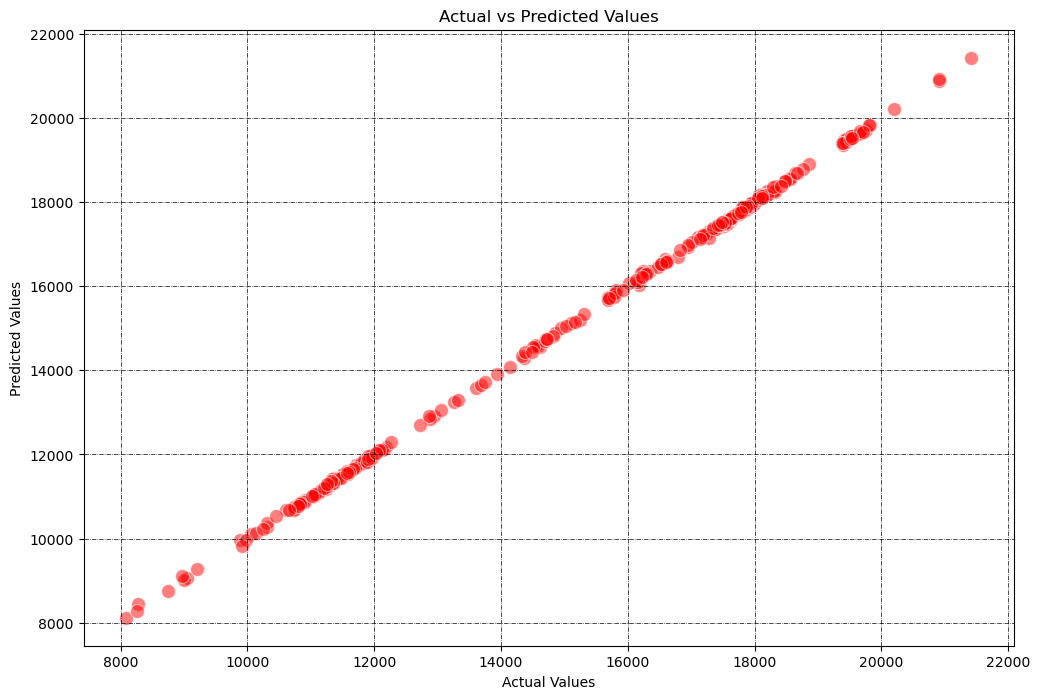

In [50]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=prediction, c='red', s=100, alpha=0.5)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [69]:
import plotly.graph_objects as go

from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Nifty'),row_heights=[1, 0.4])

# Plot OHLC on 1st row

fig.add_trace(go.Candlestick(x=data['Date'],
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'], name="Nifty-50"),row=1,col=1)

# Bar trace for volumes on 2nd row without legend

#fig.add_trace(go.Bar(x=data['Date'],showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

# 

# THANK YOU